In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import urllib.request as request  
import matplotlib.pyplot as plt

In [4]:
# Download dataset and prepare data
IRIS_TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"  
IRIS_TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'species']  
train = pd.read_csv(IRIS_TRAIN_URL, names = names, skiprows= 1)
test = pd.read_csv(IRIS_TEST_URL, names = names, skiprows= 1)
# Train and test input data
train_X = train.drop("species", axis=1)  
test_X = test.drop("species", axis=1)
# Encode target values into binary ('one-hot' style) representation
train_Y = pd.get_dummies(train.species)
test_Y = pd.get_dummies(test.species)

In [9]:
train_X.shape ## (120,4)
train_Y.shape ##(120,3)
test_X.shape  ##(30,4)
test_Y.shape  ## (30,3)


(30, 3)

In [10]:
# set hyper parameters
learning_rate = 0.01
training_epochs = 2000
display_steps = 200

## network parameters
n_input = 4
n_hidden = 10
n_output = 3

In [14]:
# Create and train a tensorflow model of a neural network
def create_train_model(hidden_nodes, num_iters):

    # Reset the graph
    tf.reset_default_graph()

    # Placeholders for input and output data
    X = tf.placeholder(shape=(120, 4), dtype=tf.float64, name='X')
    y = tf.placeholder(shape=(120, 3), dtype=tf.float64, name='y')

    # Variables for two group of weights between the three layers of the network
    W1 = tf.Variable(np.random.rand(4, hidden_nodes), dtype=tf.float64)
    W2 = tf.Variable(np.random.rand(hidden_nodes, 3), dtype=tf.float64)

    # Create the neural net graph
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Define a loss function
    deltas = tf.square(y_est - y)
    loss = tf.reduce_sum(deltas)

    # Define a train operation to minimize the loss
    optimizer = tf.train.GradientDescentOptimizer(0.005)
    train = optimizer.minimize(loss)

    # Initialize variables and run session
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)

    # Go through num_iters iterations
    for i in range(num_iters):
        sess.run(train, feed_dict={X: train_X, y: train_Y})
        loss_plot[hidden_nodes].append(sess.run(loss, feed_dict={X: train_X.as_matrix(), y: train_Y.as_matrix()}))
        weights1 = sess.run(W1)
        weights2 = sess.run(W2)

    print("loss (hidden nodes: %d, iterations: %d): %.2f" % (hidden_nodes, num_iters, loss_plot[hidden_nodes][-1]))
    sess.close()
    return weights1, weights2

C:\Users\anirima.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


loss (hidden nodes: 5, iterations: 2000): 35.97
loss (hidden nodes: 10, iterations: 2000): 7.92
loss (hidden nodes: 20, iterations: 2000): 6.61


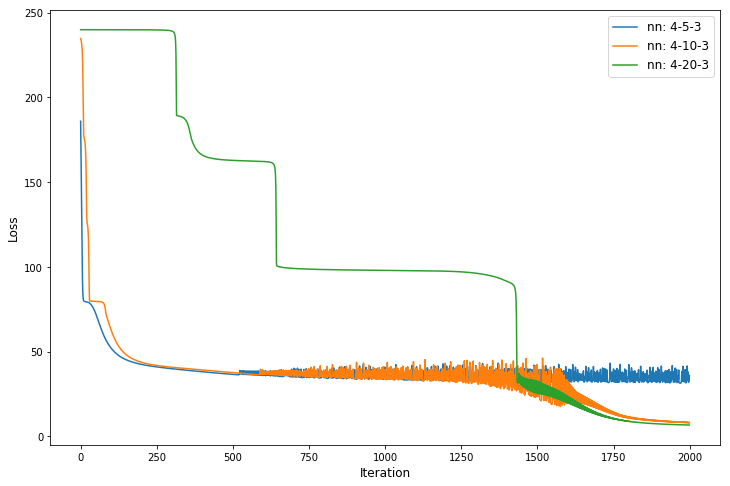

In [16]:
# Run the training for 3 different network architectures: (4-5-3) (4-10-3) (4-20-3)

# Plot the loss function over iterations
num_hidden_nodes = [5, 10, 20]  
loss_plot = {5: [], 10: [], 20: []}  
weights1 = {5: None, 10: None, 20: None}  
weights2 = {5: None, 10: None, 20: None}  
num_iters = 2000

plt.figure(figsize=(12,8))  
for hidden_nodes in num_hidden_nodes:  
    weights1[hidden_nodes], weights2[hidden_nodes] = create_train_model(hidden_nodes, num_iters)
    plt.plot(range(num_iters), loss_plot[hidden_nodes], label="nn: 4-%d-3" % hidden_nodes)

plt.xlabel('Iteration', fontsize=12)  
plt.ylabel('Loss', fontsize=12)  
plt.legend(fontsize=12) 

In [20]:
# Evaluate models on the test set
X = tf.placeholder(shape=(30, 4), dtype=tf.float64, name='X')  
y = tf.placeholder(shape=(30, 3), dtype=tf.float64, name='y')

for hidden_nodes in num_hidden_nodes:

    # Forward propagation
    W1 = tf.Variable(weights1[hidden_nodes])
    W2 = tf.Variable(weights2[hidden_nodes])
    A1 = tf.sigmoid(tf.matmul(X, W1))
    y_est = tf.sigmoid(tf.matmul(A1, W2))

    # Calculate the predicted outputs
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        y_est_np = sess.run(y_est, feed_dict={X: test_X, y: test_Y})

    # Calculate the prediction accuracy
    correct = [estimate.argmax(axis=0) == target.argmax(axis=0) 
               for estimate, target in zip(y_est_np, test_Y.as_matrix())]
    accuracy = 100 * sum(correct) / len(correct)
    print('Network architecture 4-%d-3, accuracy: %.2f%%' % (hidden_nodes, accuracy))


Network architecture 4-5-3, accuracy: 60.00%
Network architecture 4-10-3, accuracy: 96.67%
Network architecture 4-20-3, accuracy: 96.67%


C:\Users\anirima.ghosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
